In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [2]:
watercolor = 'lightskyblue'
landcolour = 'papayawhip'
cmap = (plt.get_cmap('plasma'))
cmap.set_bad('black')

<ipython-input-2-078201c8d412>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_bad('black')


In [3]:
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [4]:
data3d = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first240_oilconc.nc')

In [5]:
imin, imax = 520, 720
jmin, jmax = 100, 300
y_slice = np.arange(imin, imax)
x_slice = np.arange(jmin, jmax)

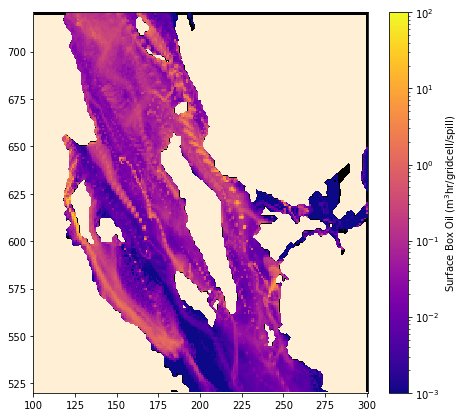

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7))
colours = ax.pcolormesh(np.arange(jmin,jmax+1)+0.75, np.arange(imin,imax+1)+0.75, data3d.OilWaterColumnOilVol_3D[0, 39, imin:imax, jmin:jmax], 
              cmap='plasma', norm=colors.LogNorm(vmin=0.001, vmax=100));
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Surface Box Oil (m$^3$hr/gridcell/spill)')
viz_tools.plot_land_mask(ax, '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour);
viz_tools.set_aspect(ax);
fig.savefig('Concentration_for_240.png')

In [7]:
profile = data3d.OilWaterColumnOilVol_3D[0, :, imin:imax, jmin:jmax].sum(axis=2).sum(axis=1)

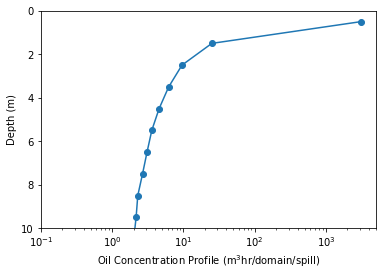

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(profile, 39.5-profile.grid_z, 'o-')
ax.set_xscale("log")
ax.set_xlim(0.1, 5000)
ax.set_ylim(0, 10);
ax.set_ylabel("Depth (m)")
ax.set_xlabel("Oil Concentration Profile (m$^3$hr/domain/spill)")
ax.invert_yaxis();
fig.savefig('Concentration_profile_for_240.png')

In [62]:
play =xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/Lagrangian_bunker-14_northern_strait_first30-14.nc')


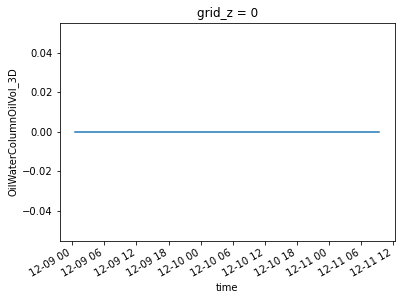

In [63]:
play.OilWaterColumnOilVol_3D[:, 0, :, :].sum(axis=1).sum(axis=1).plot()

In [65]:
play.time

<xarray.DataArray 'time' (time: 58)>
array(['2018-12-09T00:30:00.000000000', '2018-12-09T01:30:00.000000000',
       '2018-12-09T02:30:00.000000000', '2018-12-09T03:30:00.000000000',
       '2018-12-09T04:30:00.000000000', '2018-12-09T05:30:00.000000000',
       '2018-12-09T06:30:00.000000000', '2018-12-09T07:30:00.000000000',
       '2018-12-09T08:30:00.000000000', '2018-12-09T09:30:00.000000000',
       '2018-12-09T10:30:00.000000000', '2018-12-09T11:30:00.000000000',
       '2018-12-09T12:30:00.000000000', '2018-12-09T13:30:00.000000000',
       '2018-12-09T14:30:00.000000000', '2018-12-09T15:30:00.000000000',
       '2018-12-09T16:30:00.000000000', '2018-12-09T17:30:00.000000000',
       '2018-12-09T18:30:00.000000000', '2018-12-09T19:30:00.000000000',
       '2018-12-09T20:30:00.000000000', '2018-12-09T21:30:00.000000000',
       '2018-12-09T22:30:00.000000000', '2018-12-09T23:30:00.000000000',
       '2018-12-10T00:30:00.000000000', '2018-12-10T01:30:00.000000000',
       '2018-12-10T02:30:00.000000000', '2018-12-10T03:30:00.000000000',
       '2018-12-10T04:30:00.000000000', '2018-12-10T05:30:00.000000000',
       '2018-12-10T06:30:00.000000000', '2018-12-10T07:30:00.000000000',
       '2018-12-10T08:30:00.000000000', '2018-12-10T09:30:00.000000000',
       '2018-12-10T10:30:00.000000000', '2018-12-10T11:30:00.000000000',
       '2018-12-10T12:30:00.000000000', '2018-12-10T13:30:00.000000000',
       '2018-12-10T14:30:00.000000000', '2018-12-10T15:30:00.000000000',
       '2018-12-10T16:30:00.000000000', '2018-12-10T17:30:00.000000000',
       '2018-12-10T18:30:00.000000000', '2018-12-10T19:30:00.000000000',
       '2018-12-10T20:30:00.000000000', '2018-12-10T21:30:00.000000000',
       '2018-12-10T22:30:00.000000000', '2018-12-10T23:30:00.000000000',
       '2018-12-11T00:30:00.000000000', '2018-12-11T01:30:00.000000000',
       '2018-12-11T02:30:00.000000000', '2018-12-11T03:30:00.000000000',
       '2018-12-11T04:30:00.000000000', '2018-12-11T05:30:00.000000000',
       '2018-12-11T06:30:00.000000000', '2018-12-11T07:30:00.000000000',
       '2018-12-11T08:30:00.000000000', '2018-12-11T09:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-12-09T00:30:00 ... 2018-12-11T09:30:00
Attributes:
    standard_name:  time
    long_name:      time
    tz_name:        UTC